In [2]:
#Singleton DP

Sending email to alice@example.com: Welcome!
Email: Email Message
SMS: SMS Message
Printing MyDoc.pdf
Scanning MyDoc.pdf
Saving 'User data' to MySQL


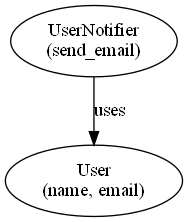

In [3]:
from graphviz import Digraph
from IPython.display import Image, display
from abc import ABC, abstractmethod

# --- SRP: Single Responsibility Principle ---
class User:
    def __init__(self, name, email):
        self.name = name
        self.email = email

class UserNotifier:
    def send_email(self, user, message):
        print(f"Sending email to {user.email}: {message}")

# SRP Diagram
dot = Digraph('SRP')
dot.node('User', 'User\n(name, email)')
dot.node('UserNotifier', 'UserNotifier\n(send_email)')
dot.edge('UserNotifier', 'User', label='uses')
dot.render('srp.gv', format='png')

# --- OCP: Open/Closed Principle ---
class Notifier(ABC):
    @abstractmethod
    def send(self, message):
        pass

class EmailNotifier(Notifier):
    def send(self, message):
        print(f"Email: {message}")

class SMSNotifier(Notifier):
    def send(self, message):
        print(f"SMS: {message}")

# --- LSP: Liskov Substitution Principle ---
def notify_user(notifier: Notifier, message: str):
    notifier.send(message)

# --- ISP: Interface Segregation Principle ---
class Printer(ABC):
    @abstractmethod
    def print_doc(self, doc):
        pass

class Scanner(ABC):
    @abstractmethod
    def scan_doc(self, doc):
        pass

class MultiFunctionPrinter(Printer, Scanner):
    def print_doc(self, doc):
        print(f"Printing {doc}")

    def scan_doc(self, doc):
        print(f"Scanning {doc}")

# --- DIP: Dependency Inversion Principle ---
class Database(ABC):
    @abstractmethod
    def save(self, data):
        pass

class MySQLDatabase(Database):
    def save(self, data):
        print(f"Saving '{data}' to MySQL")

class Application:
    def __init__(self, db: Database):
        self.db = db

    def save_data(self, data):
        self.db.save(data)

# --- Demo usage ---
user = User("Alice", "alice@example.com")
notifier = UserNotifier()
notifier.send_email(user, "Welcome!")

email_notifier = EmailNotifier()
sms_notifier = SMSNotifier()
notify_user(email_notifier, "Email Message")
notify_user(sms_notifier, "SMS Message")

printer = MultiFunctionPrinter()
printer.print_doc("MyDoc.pdf")
printer.scan_doc("MyDoc.pdf")

app = Application(MySQLDatabase())
app.save_data("User data")

# Display SRP diagram inline
display(Image('srp.gv.png'))


In [4]:
#Factory DP

Woof!
Meow!


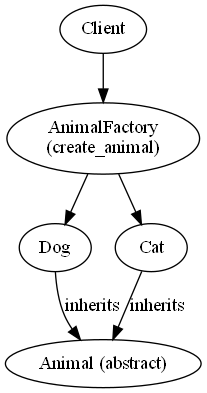

In [5]:
from graphviz import Digraph
from IPython.display import Image, display
from abc import ABC, abstractmethod

# Abstract Product
class Animal(ABC):
    @abstractmethod
    def speak(self):
        pass

# Concrete Products
class Dog(Animal):
    def speak(self):
        return "Woof!"

class Cat(Animal):
    def speak(self):
        return "Meow!"

# Factory
class AnimalFactory:
    @staticmethod
    def create_animal(animal_type: str) -> Animal:
        if animal_type == "dog":
            return Dog()
        elif animal_type == "cat":
            return Cat()
        else:
            raise ValueError(f"Unknown animal type: {animal_type}")

# Usage
dog = AnimalFactory.create_animal("dog")
cat = AnimalFactory.create_animal("cat")

print(dog.speak())  # Woof!
print(cat.speak())  # Meow!

# Diagram
dot = Digraph('FactoryPattern')
dot.node('Client', 'Client')
dot.node('Factory', 'AnimalFactory\n(create_animal)')
dot.node('Animal', 'Animal (abstract)')
dot.node('Dog', 'Dog')
dot.node('Cat', 'Cat')

dot.edges([('Client', 'Factory'), ('Factory', 'Dog'), ('Factory', 'Cat')])
dot.edge('Dog', 'Animal', label='inherits')
dot.edge('Cat', 'Animal', label='inherits')

dot.render('factory_pattern.gv', format='png')
display(Image('factory_pattern.gv.png'))


In [10]:
#Observer DP

Email Observer received: New event occurred!
SMS Observer received: New event occurred!


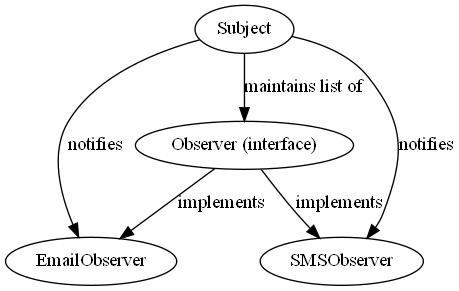

In [11]:
from abc import ABC, abstractmethod
from graphviz import Digraph
from IPython.display import Image, display

# Observer interface
class Observer(ABC):
    @abstractmethod
    def update(self, message):
        pass

# Concrete Observers
class EmailObserver(Observer):
    def update(self, message):
        print(f"Email Observer received: {message}")

class SMSObserver(Observer):
    def update(self, message):
        print(f"SMS Observer received: {message}")

# Subject
class Subject:
    def __init__(self):
        self._observers = []

    def register(self, observer: Observer):
        self._observers.append(observer)

    def unregister(self, observer: Observer):
        self._observers.remove(observer)

    def notify(self, message):
        for observer in self._observers:
            observer.update(message)

# Usage
subject = Subject()
email_observer = EmailObserver()
sms_observer = SMSObserver()

subject.register(email_observer)
subject.register(sms_observer)

subject.notify("New event occurred!")

# Diagram
dot = Digraph('ObserverPattern')
dot.node('Subject', 'Subject')
dot.node('Observer', 'Observer (interface)')
dot.node('EmailObserver', 'EmailObserver')
dot.node('SMSObserver', 'SMSObserver')
dot.edge('Subject', 'Observer', label='maintains list of')
dot.edge('Observer', 'EmailObserver', label='implements')
dot.edge('Observer', 'SMSObserver', label='implements')
dot.edge('Subject', 'EmailObserver', label='notifies')
dot.edge('Subject', 'SMSObserver', label='notifies')

dot.render('observer_pattern.gv', format='png')
display(Image('observer_pattern.gv.png'))


In [12]:
#Decorator DP

Simple Coffee Cost: 5
Coffee with Milk Cost: 7
Coffee with Milk and Sugar Cost: 8


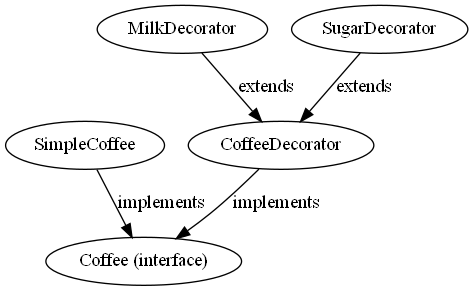

In [13]:
from abc import ABC, abstractmethod
from graphviz import Digraph
from IPython.display import Image, display

# Component interface
class Coffee(ABC):
    @abstractmethod
    def cost(self):
        pass

# Concrete Component
class SimpleCoffee(Coffee):
    def cost(self):
        return 5

# Decorator base class
class CoffeeDecorator(Coffee):
    def __init__(self, coffee: Coffee):
        self._coffee = coffee

    def cost(self):
        return self._coffee.cost()

# Concrete Decorators
class MilkDecorator(CoffeeDecorator):
    def cost(self):
        return self._coffee.cost() + 2

class SugarDecorator(CoffeeDecorator):
    def cost(self):
        return self._coffee.cost() + 1

# Usage
simple_coffee = SimpleCoffee()
print("Simple Coffee Cost:", simple_coffee.cost())

milk_coffee = MilkDecorator(simple_coffee)
print("Coffee with Milk Cost:", milk_coffee.cost())

sugar_milk_coffee = SugarDecorator(milk_coffee)
print("Coffee with Milk and Sugar Cost:", sugar_milk_coffee.cost())

# Diagram
dot = Digraph('DecoratorPattern')
dot.node('Component', 'Coffee (interface)')
dot.node('ConcreteComponent', 'SimpleCoffee')
dot.node('Decorator', 'CoffeeDecorator')
dot.node('MilkDecorator', 'MilkDecorator')
dot.node('SugarDecorator', 'SugarDecorator')

dot.edge('ConcreteComponent', 'Component', label='implements')
dot.edge('Decorator', 'Component', label='implements')
dot.edge('MilkDecorator', 'Decorator', label='extends')
dot.edge('SugarDecorator', 'Decorator', label='extends')

dot.render('decorator_pattern.gv', format='png')
display(Image('decorator_pattern.gv.png'))


In [14]:
#Abstract Factory DP

Windows GUI:
Render a button in Windows style
Render a checkbox in Windows style

MacOS GUI:
Render a button in MacOS style
Render a checkbox in MacOS style


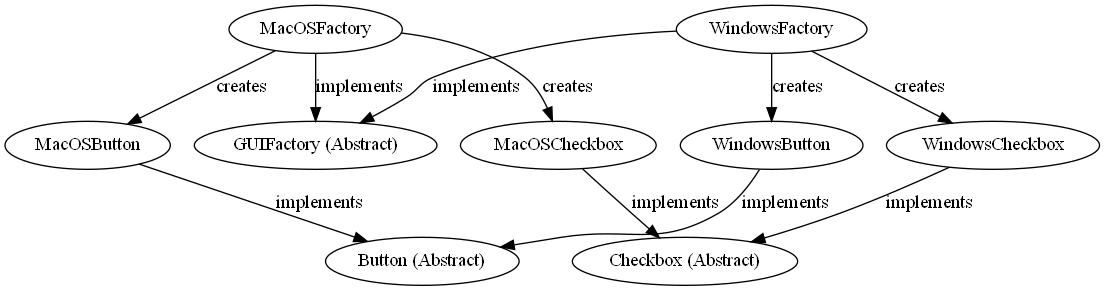

In [16]:
from abc import ABC, abstractmethod
from graphviz import Digraph
from IPython.display import Image, display

# Abstract Products
class Button(ABC):
    @abstractmethod
    def paint(self):
        pass

class Checkbox(ABC):
    @abstractmethod
    def paint(self):
        pass

# Concrete Products for Windows
class WindowsButton(Button):
    def paint(self):
        return "Render a button in Windows style"

class WindowsCheckbox(Checkbox):
    def paint(self):
        return "Render a checkbox in Windows style"

# Concrete Products for MacOS
class MacOSButton(Button):
    def paint(self):
        return "Render a button in MacOS style"

class MacOSCheckbox(Checkbox):
    def paint(self):
        return "Render a checkbox in MacOS style"

# Abstract Factory
class GUIFactory(ABC):
    @abstractmethod
    def create_button(self) -> Button:
        pass

    @abstractmethod
    def create_checkbox(self) -> Checkbox:
        pass

# Concrete Factories
class WindowsFactory(GUIFactory):
    def create_button(self) -> Button:
        return WindowsButton()

    def create_checkbox(self) -> Checkbox:
        return WindowsCheckbox()

class MacOSFactory(GUIFactory):
    def create_button(self) -> Button:
        return MacOSButton()

    def create_checkbox(self) -> Checkbox:
        return MacOSCheckbox()

# Client code
def client_code(factory: GUIFactory):
    button = factory.create_button()
    checkbox = factory.create_checkbox()
    print(button.paint())
    print(checkbox.paint())

# Usage
print("Windows GUI:")
client_code(WindowsFactory())

print("\nMacOS GUI:")
client_code(MacOSFactory())

# Diagram
dot = Digraph('AbstractFactoryPattern')
dot.node('GUIFactory', 'GUIFactory (Abstract)')
dot.node('WindowsFactory', 'WindowsFactory')
dot.node('MacOSFactory', 'MacOSFactory')

dot.node('Button', 'Button (Abstract)')
dot.node('Checkbox', 'Checkbox (Abstract)')

dot.node('WindowsButton', 'WindowsButton')
dot.node('WindowsCheckbox', 'WindowsCheckbox')

dot.node('MacOSButton', 'MacOSButton')
dot.node('MacOSCheckbox', 'MacOSCheckbox')

# Factory inheritance
dot.edge('WindowsFactory', 'GUIFactory', label='implements')
dot.edge('MacOSFactory', 'GUIFactory', label='implements')

# Product inheritance
dot.edge('WindowsButton', 'Button', label='implements')
dot.edge('WindowsCheckbox', 'Checkbox', label='implements')

dot.edge('MacOSButton', 'Button', label='implements')
dot.edge('MacOSCheckbox', 'Checkbox', label='implements')

# Factory produces
dot.edge('WindowsFactory', 'WindowsButton', label='creates')
dot.edge('WindowsFactory', 'WindowsCheckbox', label='creates')

dot.edge('MacOSFactory', 'MacOSButton', label='creates')
dot.edge('MacOSFactory', 'MacOSCheckbox', label='creates')

dot.render('abstract_factory_pattern.gv', format='png')
display(Image('abstract_factory_pattern.gv.png'))


In [17]:
#Dependency Inversion DP

Saving 'User data for MySQL' to MySQL database
Saving 'User data for Mongo' to MongoDB database


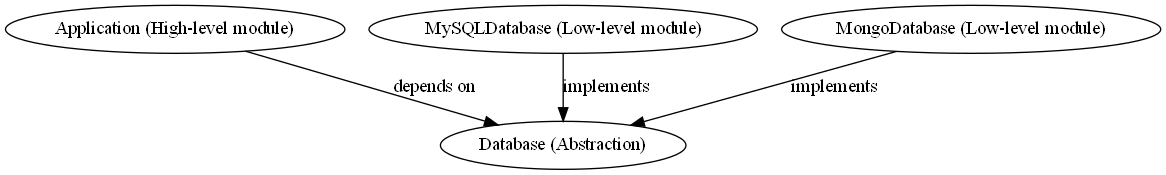

In [18]:
from abc import ABC, abstractmethod
from graphviz import Digraph
from IPython.display import Image, display

# High-level module depends on this abstraction
class Database(ABC):
    @abstractmethod
    def save(self, data):
        pass

# Low-level module implementing the abstraction
class MySQLDatabase(Database):
    def save(self, data):
        print(f"Saving '{data}' to MySQL database")

class MongoDatabase(Database):
    def save(self, data):
        print(f"Saving '{data}' to MongoDB database")

# High-level module that depends on abstraction
class Application:
    def __init__(self, database: Database):
        self.database = database

    def save_data(self, data):
        self.database.save(data)

# Usage
mysql_db = MySQLDatabase()
mongo_db = MongoDatabase()

app_mysql = Application(mysql_db)
app_mongo = Application(mongo_db)

app_mysql.save_data("User data for MySQL")
app_mongo.save_data("User data for Mongo")

# Diagram
dot = Digraph('DependencyInversion')
dot.node('Application', 'Application (High-level module)')
dot.node('Database', 'Database (Abstraction)')
dot.node('MySQLDatabase', 'MySQLDatabase (Low-level module)')
dot.node('MongoDatabase', 'MongoDatabase (Low-level module)')

dot.edge('Application', 'Database', label='depends on')
dot.edge('MySQLDatabase', 'Database', label='implements')
dot.edge('MongoDatabase', 'Database', label='implements')

dot.render('dependency_inversion.gv', format='png')
display(Image('dependency_inversion.gv.png'))

